<a href="https://colab.research.google.com/github/sakshi1018/Pima-Indians-Diabetes/blob/master/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#pd.options.plotting.backend = "plotly"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data=pd.read_csv("/content/datasets_14370_19291_pima-indians-diabetes.csv")
data.columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Class']
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


Pregnancies = Number of times pregnant

Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure = Diastolic blood pressure (mm Hg)

SkinThickness = Triceps skin fold thickness (mm)

Insulin = 2-Hour serum insulin (mu U/ml)

BMI = Body mass index (weight in kg/(height in m)^2)

Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

BMI-numerical value of your weight in relation to your height

BMI (18.5 and 25)kg/m^2 --- normal weight

BMI < 18.5 kg/m^2 --- underweight

BMI (25 and 29.9) kg/m^2 --- overweight

BMI > 30 kg/m^2 --- obese


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Class                     767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5, 1.0, 'wt v/s count')

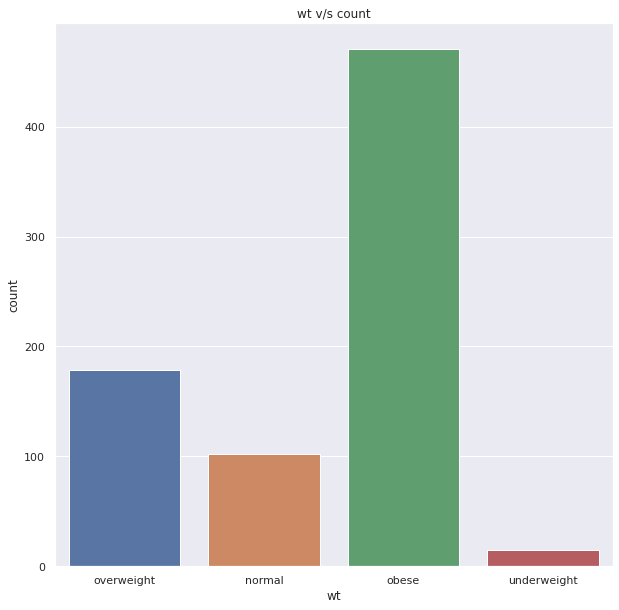

In [8]:
def n(num):
  if num>=18.5 and num<25:
    return 'normal'
  elif num < 18.5:
    return 'underweight'
  elif num >= 25 and num <=29.9:
    return 'overweight'
  else:
    return 'obese'

data['wt']=data['BMI'].apply(n)
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
sns.countplot(x="wt", data=data)
plt.ylabel("count")
plt.xlabel("wt")
plt.title("wt v/s count")

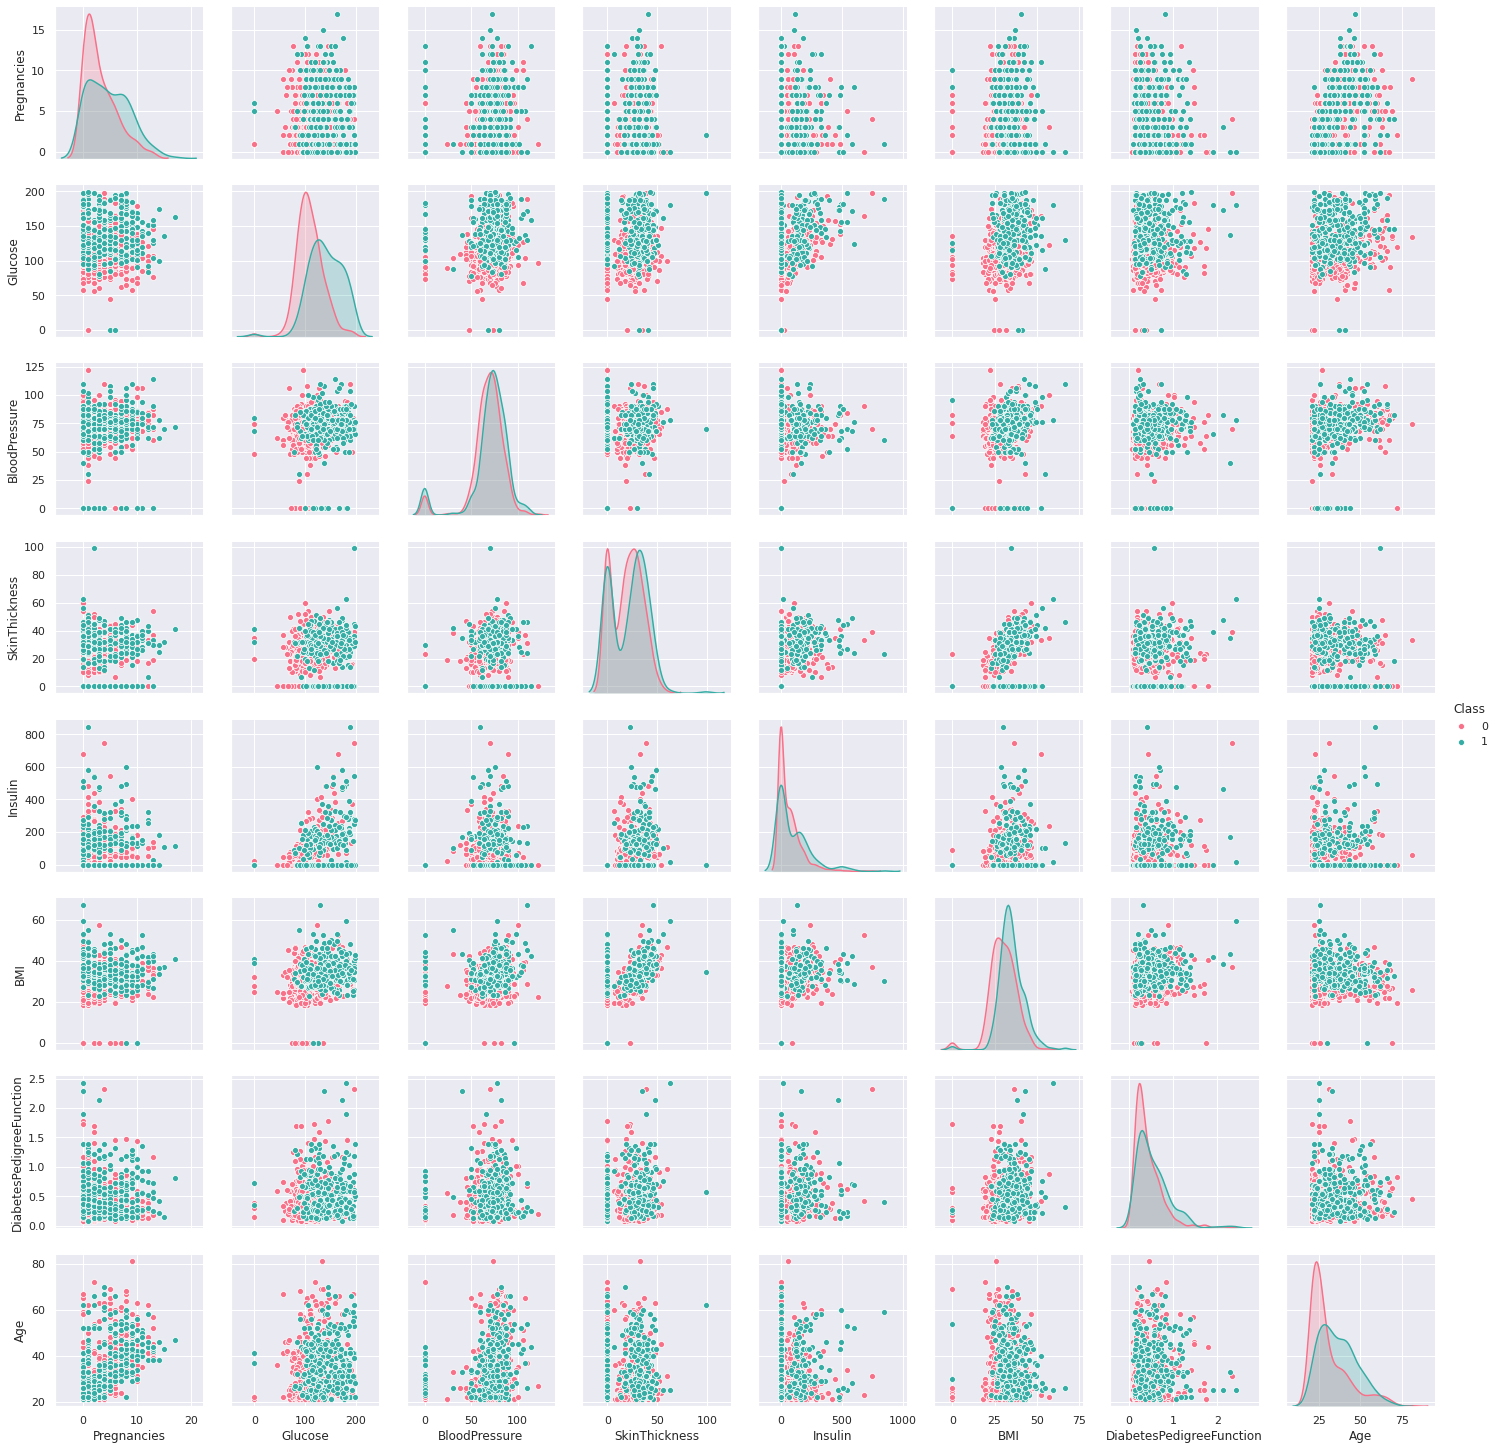

In [6]:

sns.pairplot(data,hue="Class",palette="husl")

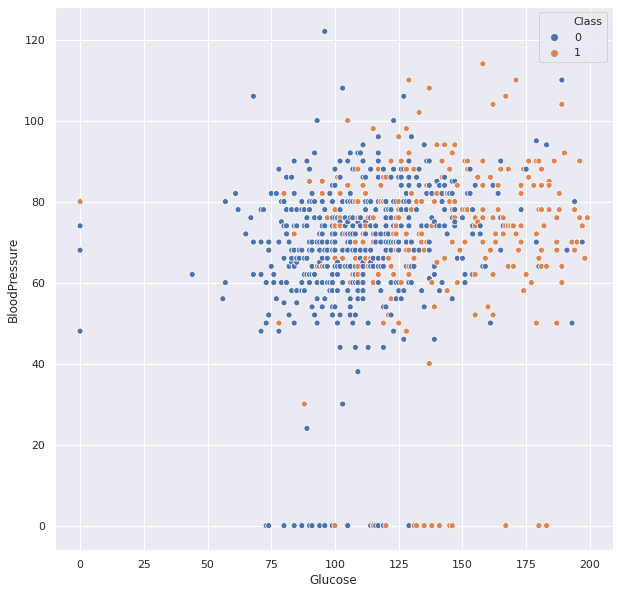

In [9]:
result=data.sort_values('Glucose', axis=0,ascending=True)
plt.figure(figsize=(10,10))
sns.scatterplot(result['Glucose'],result['BloodPressure'],hue=result['Class'])

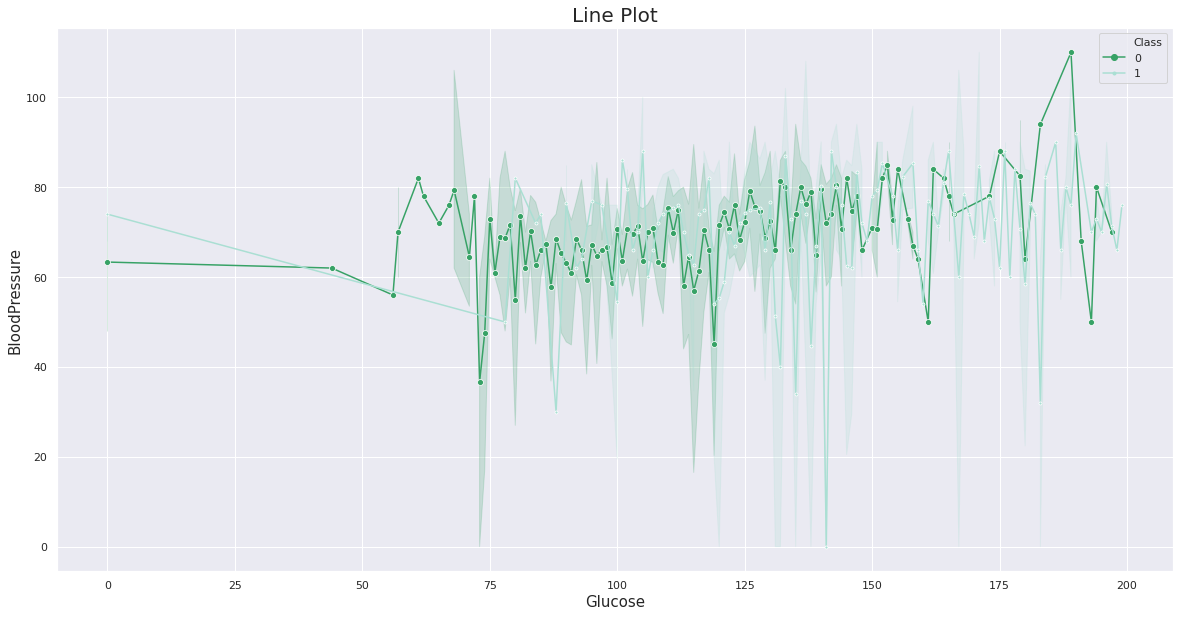

In [10]:
plt.figure(figsize=(20,10))

sns.lineplot(x = "Glucose", y = "BloodPressure", data = result, hue = "Class",
            style = "Class", palette = "BuGn_r", dashes = False, 
            markers = ["o", "."])
 
plt.title("Line Plot", fontsize = 20) # for title
plt.xlabel("Glucose", fontsize = 15) # label for x-axis
plt.ylabel("BloodPressure", fontsize = 15) # label for y-axis
plt.show()

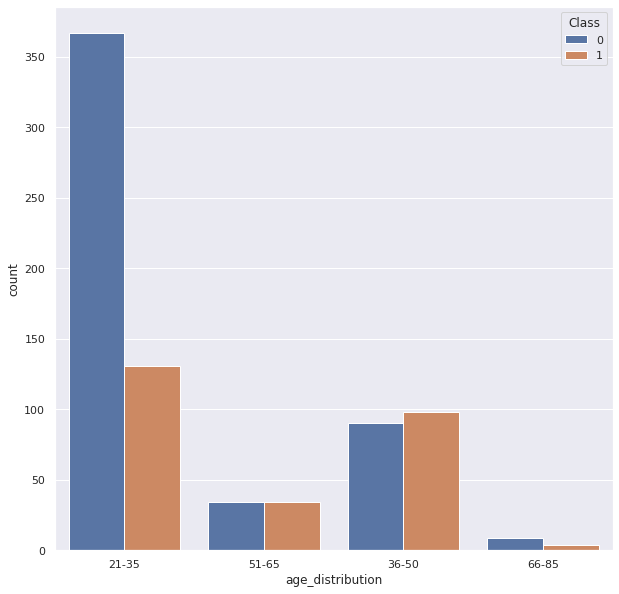

In [12]:
def n(num):
  if num>=21 and num<=35:
    return '21-35'
  elif num>=36 and num<=50:
    return '36-50'
  elif num >= 51 and num <=65:
    return '51-65'
  elif num >= 66 and num <=85:
    return '66-85'
  
data['age_distribution']=data['Age'].apply(n)
plt.figure(figsize=(10,10))
sns.countplot(x="age_distribution", hue="Class", data=data)

#split data using train_test_split


In [13]:
from sklearn.model_selection import train_test_split
X=data.iloc[:,0:8]
y=data['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

#APPLY MACHINE LEARNING ALGORITHM

#KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print('Accuracy of KNeighborsClassifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNeighborsClassifier on testing set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of KNeighborsClassifier on training set: 0.80
Accuracy of KNeighborsClassifier on testing set: 0.71


### value of k parameter to avoid overfitting and underfitting of data

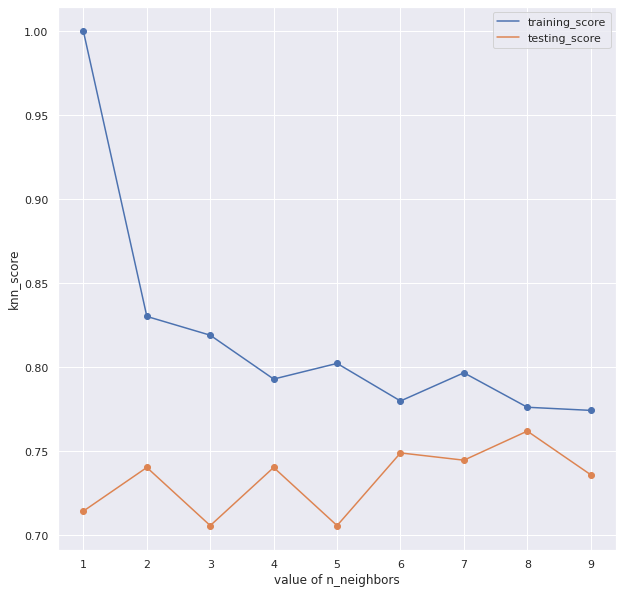

In [17]:
training=[]
testing=[]
for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train,y_train)
  pred_knn=knn.predict(X_test)
  tra=knn.score(X_train, y_train)
  test=knn.score(X_test, y_test)
  training.append(tra)
  testing.append(test)
plt.figure(figsize=(10,10))
plt.plot(np.arange(1,10),training)
plt.scatter(np.arange(1,10),training)
plt.plot(np.arange(1,10),testing)
plt.scatter(np.arange(1,10),testing)
plt.xlabel("value of n_neighbors")
plt.ylabel("knn_score")
plt.legend(['training_score','testing_score']) 

In [18]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print('Accuracy of KNeighborsClassifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNeighborsClassifier on testing set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of KNeighborsClassifier on training set: 0.78
Accuracy of KNeighborsClassifier on testing set: 0.76


###Data Standardization


In [19]:
from sklearn import preprocessing
standardized_X = preprocessing.scale(X)
standardized_X_train,standardized_X_test,y_train,y_test=train_test_split(standardized_X,y,test_size=0.3,random_state=0)

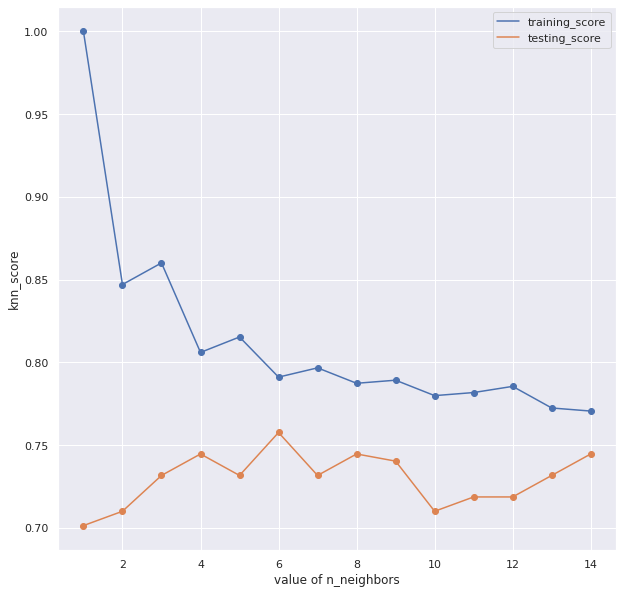

In [20]:
training=[]
testing=[]
for i in range(1,15):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(standardized_X_train,y_train)
  pred_knn=knn.predict(standardized_X_test)
  tra=knn.score(standardized_X_train, y_train)
  test=knn.score(standardized_X_test, y_test)
  training.append(tra)
  testing.append(test)
plt.figure(figsize=(10,10))
plt.plot(np.arange(1,15),training)
plt.scatter(np.arange(1,15),training)
plt.plot(np.arange(1,15),testing)
plt.scatter(np.arange(1,15),testing)
plt.xlabel("value of n_neighbors")
plt.ylabel("knn_score")
plt.legend(['training_score','testing_score']) 

In [21]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print('Accuracy of KNeighborsClassifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNeighborsClassifier on testing set: {:.2f}'.format(knn.score(X_test, y_test)))


Accuracy of KNeighborsClassifier on training set: 0.78
Accuracy of KNeighborsClassifier on testing set: 0.75


##Logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
lr=LogisticRegression().fit(X_train,y_train)
pred=lr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(lr.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(lr.score(X_test, y_test)))
print('confusion_matrix:',confusion_matrix(y_test,pred))
print('accuracy_score:',accuracy_score(y_test,pred)*100)

Accuracy of logistic regression classifier on training set: 0.77
Accuracy of logistic regression classifier on training set: 0.78
confusion_matrix: [[140  19]
 [ 32  40]]
accuracy_score: 77.92207792207793


###Data Standardization




In [24]:
lr=LogisticRegression(C=0.1).fit(standardized_X_train,y_train)
log_pred=lr.predict(standardized_X_test)

In [25]:
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(lr.score(standardized_X_train, y_train)))
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(lr.score(standardized_X_test, y_test)))
print('confusion_matrix:',confusion_matrix(y_test,log_pred))
print('accuracy_score:',accuracy_score(y_test,log_pred)*100)

Accuracy of logistic regression classifier on training set: 0.78
Accuracy of logistic regression classifier on training set: 0.78
confusion_matrix: [[141  18]
 [ 32  40]]
accuracy_score: 78.35497835497836


#Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [27]:
for i in range(1,10):
  dtc=DecisionTreeClassifier(max_depth = i,random_state=0)
  dtc.fit(X_train, y_train)
  print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(dtc.score(X_train, y_train)))
  print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dtc.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.74
Accuracy of Decision Tree classifier on test set: 0.73
Accuracy of Decision Tree classifier on training set: 0.77
Accuracy of Decision Tree classifier on test set: 0.78
Accuracy of Decision Tree classifier on training set: 0.77
Accuracy of Decision Tree classifier on test set: 0.77
Accuracy of Decision Tree classifier on training set: 0.81
Accuracy of Decision Tree classifier on test set: 0.75
Accuracy of Decision Tree classifier on training set: 0.84
Accuracy of Decision Tree classifier on test set: 0.76
Accuracy of Decision Tree classifier on training set: 0.87
Accuracy of Decision Tree classifier on test set: 0.74
Accuracy of Decision Tree classifier on training set: 0.90
Accuracy of Decision Tree classifier on test set: 0.75
Accuracy of Decision Tree classifier on training set: 0.94
Accuracy of Decision Tree classifier on test set: 0.75
Accuracy of Decision Tree classifier on training set: 0.96
Accuracy of Decision Tree cla

##Setting max_depth to avoid overfitting

In [28]:
dtc=DecisionTreeClassifier(max_depth = 2,random_state=0)
dtc.fit(X_train, y_train)
predict=dtc.predict(X_test)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(dtc.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dtc.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.77
Accuracy of Decision Tree classifier on test set: 0.78


In [29]:
confusion_matrix(predict,y_test)

array([[142,  34],
       [ 17,  38]])

In [30]:
accuracy_score(pred,y_test)*100

77.92207792207793

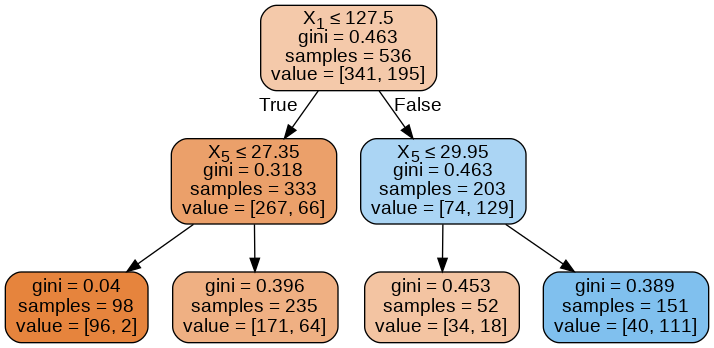

In [31]:
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

###Data Standardization


In [32]:
train_tree=[]
test_tree=[]
for i in range(1,15):
  dtc=DecisionTreeClassifier(max_depth = i,random_state=0)
  dtc.fit(standardized_X_train, y_train)
  train_tree.append(dtc.score(standardized_X_train, y_train))
  test_tree.append(dtc.score(standardized_X_test, y_test))

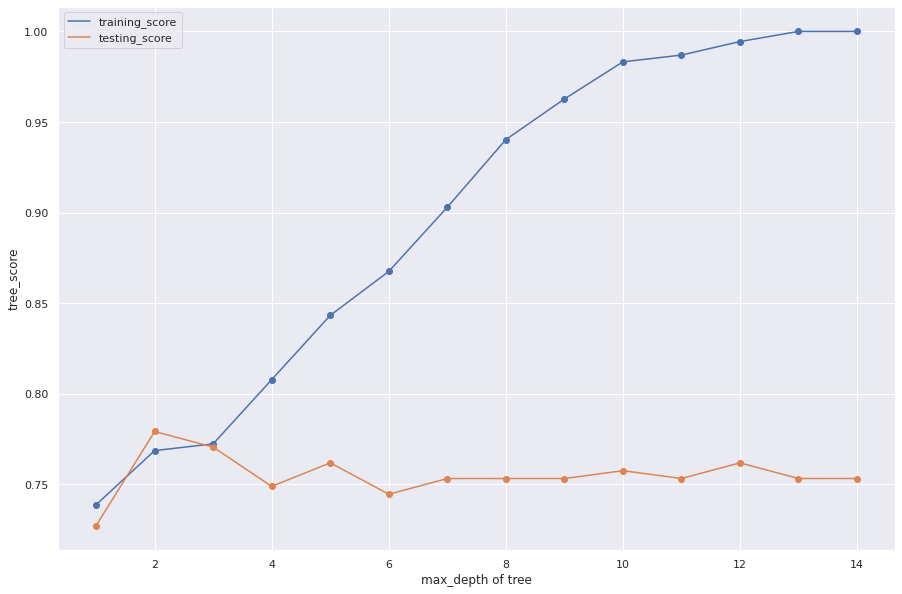

In [33]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(1,15),train_tree)
plt.plot(np.arange(1,15),test_tree)
plt.scatter(np.arange(1,15),train_tree)
plt.scatter(np.arange(1,15),test_tree)
plt.xlabel("max_depth of tree")
plt.ylabel("tree_score")
plt.legend(['training_score','testing_score']) 

In [34]:
dtc=DecisionTreeClassifier(max_depth = 3,random_state=0)
dtc.fit(standardized_X_train, y_train)
print(dtc.score(standardized_X_train, y_train))
print(dtc.score(standardized_X_test, y_test))

0.7723880597014925
0.7705627705627706


#Support Vector Machine

In [35]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 0)

In [36]:
clf = SVC(C=11).fit(X_train, y_train)
predict3=clf.predict(X_test)
print('Accuracy of SVC on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of SVC on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of SVC on training set: 0.78
Accuracy of SVC on test set: 0.77


In [37]:
confusion_matrix(predict3,y_test)

array([[140,  33],
       [ 19,  39]])

In [38]:
accuracy_score(predict3,y_test)*100

77.48917748917748

#Naive Bayes classifiers

In [39]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)

In [40]:
print('Accuracy of GaussianNB classifier on training set: {:.2f}'.format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'.format(nbclf.score(X_test, y_test)))

Accuracy of GaussianNB classifier on training set: 0.75
Accuracy of GaussianNB classifier on test set: 0.79
